In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

import os
from pathlib import Path
import os.path as osp

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import median_absolute_error as mae
from sklearn.metrics import mean_squared_error as  mse
from sklearn.metrics import r2_score
import joblib

C:\softwares\conda4.8.2-python3.7\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\softwares\conda4.8.2-python3.7\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\softwares\conda4.8.2-python3.7\lib\site-packages\numpy\.libs\libopenblas.noijjg62emaszi6nyurl6jbkm4evbgm7.gfortran-win_amd64.dll
C:\softwares\conda4.8.2-python3.7\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\softwares\conda4.8.2-python3.7\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_path = osp.join(os.getcwd(),'Data')
df = pd.read_csv(data_path + '/ensemble-linear-features.csv')

In [4]:
y = df['cap']
X = df.drop(['cap'],axis=1)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [6]:
X_train = X_train.drop(['Unnamed: 0'],axis=1)
X_test = X_test.drop(['Unnamed: 0'],axis=1)

In [7]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [8]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

28.568091504660224
[-0.06690934  0.06982082]


In [9]:
y_pred = regressor.predict(X_test)

In [10]:
datapoints = [i for i in range(0,len(y_test))]

In [11]:
df = pd.DataFrame({'days':datapoints , 'Actual': y_test, 'Predicted': y_pred})
df

,days,Actual,Predicted
148,0,149.681640,136.981659
96,1,225.199219,167.237306
177,2,172.878907,22.476520
225,3,3.839843,155.451888
236,4,144.859375,-45.669686
...,...,...,...
55,73,24.478516,-82.229763
22,74,-33.160156,102.480134
171,75,-152.611328,62.532116
11,76,-27.009766,204.422216


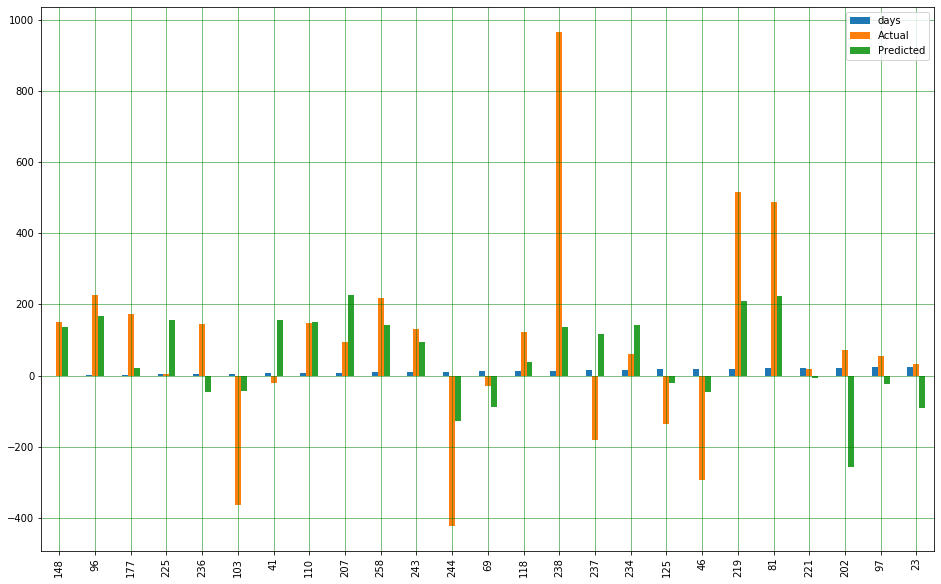

In [12]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [13]:
print('Mean squared error: %.2f'% mse(y_test, y_pred,squared=False))      
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 256.86
Coefficient of determination: 0.26


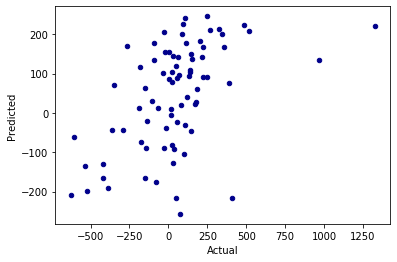

In [14]:
ax1 = df.plot.scatter(x='Actual',
                      y='Predicted',
                      c='DarkBlue')

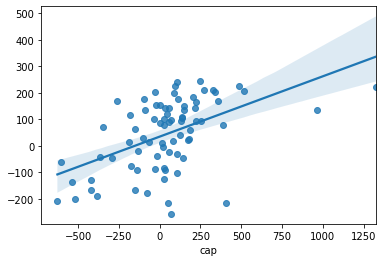

In [15]:
sns.regplot(y_test,y_pred)

In [16]:
type(y_test)

pandas.core.series.Series

In [17]:
X

,Unnamed: 0,ebc_pred,tb_pred
0,0,-952.720681,-2203.041504
1,1,-955.015961,-1978.967407
2,2,-938.103039,-1774.637573
3,3,-925.099367,-913.599731
4,4,-927.903715,-2861.465332
...,...,...,...
255,255,-889.564149,-1078.147217
256,256,-875.218537,-1310.564087
257,257,-922.968656,-997.188477
258,258,-947.588873,728.062744


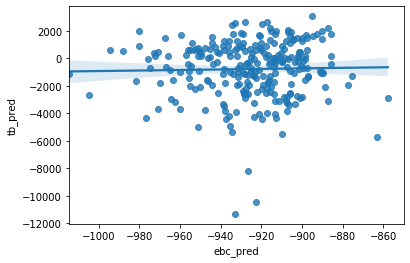

In [18]:
sns.regplot(X['ebc_pred'],X['tb_pred'])

In [19]:
from pickle import dump

In [20]:
model_path = osp.join(os.getcwd(),'Models')

In [21]:
dump(regressor, open(model_path + '/ensemble-linear.pkl', 'wb'))